# Sigma module

Computes amplitudes of density fluctuation smoothed on mass scale $M$,
$$
  \sigma^2(M) = \frac{1}{2\pi^2} \int_0^\infty W^2(k; M) P(k) dk
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mockgallib as mock

ps = mock.PowerSpectrum('../data/planck1_matterpower.dat')
s = mock.Sigma(ps)

s

M Sigma
 7.943e+09  3.826e+00
 8.059e+09  3.821e+00
 8.176e+09  3.815e+00
 8.294e+09  3.809e+00
 8.415e+09  3.804e+00
......
 1.445e+16  2.363e-01

In [2]:
print(len(s))
print("M range: %.2e %.2e" % s.M_range)
print("sigma range: %.4f %.4f" % s.sigma0_range)


1001
M range: 1.00e+10 1.00e+16
sigma range: 3.7362 0.2679


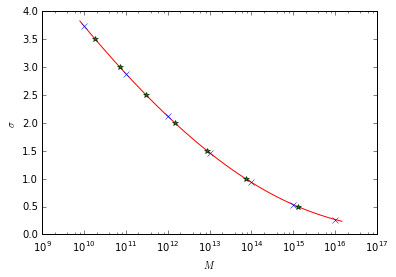

In [8]:
M = s.M               # array of M
sigma = 1.0/s.sinv    # array of sigma(M)

plt.xscale('log')
plt.xlabel('$M$')
plt.ylabel('$\\sigma$')

plt.plot(M, sigma, 'r-')

# s.sigma0(M) computes sigma0 for M in M_range using spline interpolation
M = np.power(10.0, np.arange(10.0, 17.0, 1.0))
sigma = [s.sigma0(mm) for mm in M]
plt.plot(M, sigma, 'x')

# s.mass(sigma0) computes the inverse function in sigma_range using spline interpolation
sigma = np.arange(0.5, 4.0, 0.5)
M = [s.mass(ss) for ss in sigma]
plt.plot(M, sigma, '*')

